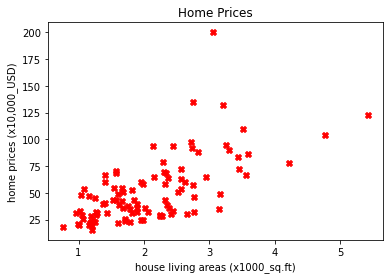

,house_living_areas_(x1000_sq.ft),"home_prices_(x10,000_USD)"
0,1.18,22.19
1,2.57,53.80
2,0.77,18.00
3,1.96,60.40
4,1.68,51.00


In [88]:
#GradientDescent Implementatiion
#7/17/2022

#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#PART A
#data preparation and visualization
df = pd.read_csv('KCSmall2.csv',header=None, names = ['house_living_areas_(x1000_sq.ft)','home_prices_(x10,000_USD)'])
x = np.array(df[['house_living_areas_(x1000_sq.ft)']])   #convert dataframe to numpy arrays
y = np.array(df[['home_prices_(x10,000_USD)']])          #convert dataframe to numpy arrays

# (1) Plotting of data points
plt.scatter(x,y, marker='X', color='red')
plt.title('Home Prices')
plt.xlabel('house living areas (x1000_sq.ft)')
plt.ylabel('home prices (x10,000_USD)')
plt.show()
df.head()

In [89]:
#(2) Loss function definition
#To print loss functiion for θ_0 = 0, θ_1 = 0 and θ_0 = -1, θ_1 = 20

θ_0 = [0, -1]
θ_1 = [0, 20]
loss_func_values = []
for i in range (len(θ_0)):
    y_predicted = θ_1[i]*x + θ_0[i]
    loss_func = (1/(2*len(x)))*np.sum((y-y_predicted)**2)
    loss_func_values = np.append(loss_func_values,[loss_func],axis=0)
print(f'loss function value for θ_0 = [0, -1] and θ_1 = [0, 20] are {loss_func_values}')

loss function value for θ_0 = [0, -1] and θ_1 = [0, 20] are [1806.55057639  330.09850139]


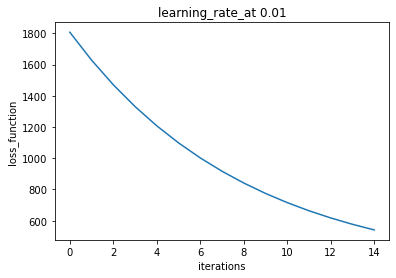

θ vector learned is [5.211905062267758, 12.663068366694144]
Loss function after iteraton is 540.9499753280136
predicted y value at x=3.5(3500sq.ft) is  49.532644345697264
predicted y value at x=7.0(7000sq.ft) is  93.85338362912677


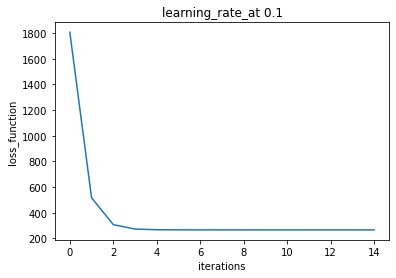

θ vector learned is [7.953939261552326, 21.28921848186058]
Loss function after iteraton is 265.95485427781216
predicted y value at x=3.5(3500sq.ft) is  82.46620394806435
predicted y value at x=7.0(7000sq.ft) is  156.9784686345764


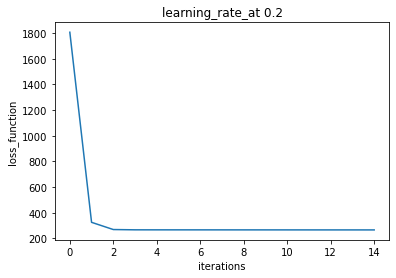

θ vector learned is [7.248495110824006, 21.585535241319086]
Loss function after iteraton is 265.58292236574994
predicted y value at x=3.5(3500sq.ft) is  82.7978684554408
predicted y value at x=7.0(7000sq.ft) is  158.3472418000576


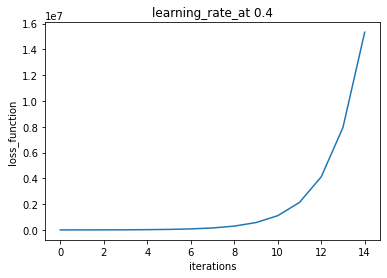

θ vector learned is [1224.7784943595025, 2923.499975495796]
Loss function after iteraton is 15325198.517958324
predicted y value at x=3.5(3500sq.ft) is  11457.02840859479
predicted y value at x=7.0(7000sq.ft) is  21689.278322830076


In [90]:
#3 & #4
# Iterations with different learning rate
learning_rate  = [0.01,0.1,0.2,0.4]
for j in learning_rate:
    θ_0=0            #initialize θ values
    θ_1=0
    iterations = 15
    loss_func_array = np.zeros(iterations)
    for i in range (iterations):
        y_predicted = θ_1*x + θ_0
        del_θ_0 = -j*(-1/(len(x)))*np.sum(y-y_predicted)     # update to θ_0
        del_θ_1 = -j*(-1/(len(x)))*np.sum((y-y_predicted)*x) # update to θ_1
        θ_0 = θ_0 + del_θ_0          
        θ_1 = θ_1 + del_θ_1
        loss_func = (1/(2*len(x)))*np.sum((y-y_predicted)**2)
        loss_func_array[i] = loss_func
    plt.plot(np.arange(0,iterations,1),loss_func_array)
    plt.title('learning_rate_at '+str(j))
    plt.xlabel('iterations')
    plt.ylabel('loss_function')
    plt.show()
    print(f'θ vector learned is {[θ_0, θ_1]}')
    print(f'Loss function after iteraton is {loss_func}')
    print('predicted y value at x=3.5(3500sq.ft) is ',θ_1*3.5 + θ_0)
    print('predicted y value at x=7.0(7000sq.ft) is ',θ_1*7.0 + θ_0)

In [91]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#PART B
#data preparation and visualization
#(1)first five columns of raw data 

df = pd.read_csv('KCSmall_NS2.csv',header=None ,names = ['n_bed','liv_area','lot_area','h_price'])
print('raw input data')
print(df[:5])    


#(2)first five columns of normalized data 
#Standardization (normalization)
mean_n_bed = np.mean(np.array(df[['n_bed']]))         #extract mean and standard deviations from the individual input columns
std_n_bed = np.std(np.array(df[['n_bed']]))
mean_liv_area = np.mean(np.array(df[['liv_area']]))
std_liv_area = np.std(np.array(df[['liv_area']]))
mean_lot_area = np.mean(np.array(df[['lot_area']]))
std_lot_area = np.std(np.array(df[['lot_area']]))

df[['n_bed']] = (df[['n_bed']] - mean_n_bed)/(std_n_bed)              #standardized n_bed
df[['liv_area']] = (df[['liv_area']] - mean_liv_area)/(std_liv_area)  #standardized liv_area
df[['lot_area']] = (df[['lot_area']] - mean_lot_area)/(std_lot_area)  #standardized lot_area

print('normalized data')
print(df[:5])


x1 = np.array(df[['n_bed']])    #convert dataframe to numpy arrays
x2 = np.array(df[['liv_area']]) #convert dataframe to numpy arrays
x3 = np.array(df[['lot_area']]) #convert dataframe to numpy arrays
y = np.array(df[['h_price']])  #convert dataframe to numpy arrays



raw input data
   n_bed  liv_area  lot_area   h_price
0      3      1180      5650  221900.0
1      3      2570      7242  538000.0
2      2       770     10000  180000.0
3      4      1960      5000  604000.0
4      3      1680      8080  510000.0
normalized data
      n_bed  liv_area  lot_area   h_price
0 -0.508001 -1.061318 -0.413048  221900.0
1 -0.508001  0.562100 -0.304939  538000.0
2 -1.778002 -1.540168 -0.117650  180000.0
3  0.762001 -0.150335 -0.457188  604000.0
4 -0.508001 -0.477355 -0.248033  510000.0


In [92]:
#3 cost function value at θ = (0,0,0,0)
θ = np.array([0,0,0,0])   #regression coefficients
y_predicted = θ[0] + θ[1]*x1 + θ[2]*x2 + θ[3]*x3
loss_func = (1/(2*len(x1)))*np.sum((y-y_predicted)**2)
print(f'cost function value at θ = (0,0,0,0) is {loss_func}')

cost function value at θ = (0,0,0,0) is 180784127566.625


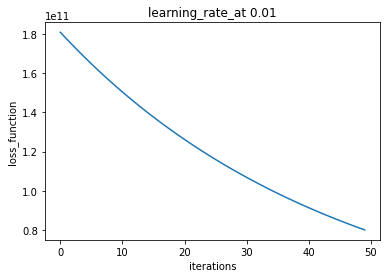

regression coefficient ([θ_0,θ_1,θ_2,θ_3]) is [205100.8168854972, 32092.45557919588, 68089.22404078879, 45323.46477294725]
Loss function value is 80125173642.86455 after iteration
predicted y value at n_bed=3, liv_area=2000, lot_area=8550 is  171947.41238590196


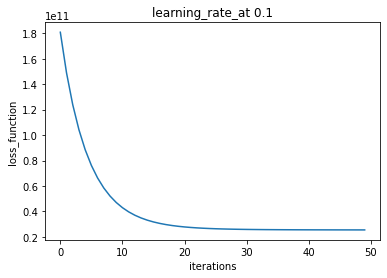

regression coefficient ([θ_0,θ_1,θ_2,θ_3]) is [516574.44938902266, 18236.953610219643, 151735.86674828993, 62177.11412385433]
Loss function value is 25524508259.35466 after iteration
predicted y value at n_bed=3, liv_area=2000, lot_area=8550 is  478149.97169487504


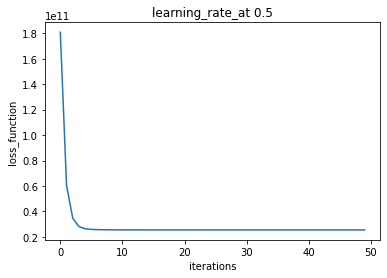

regression coefficient ([θ_0,θ_1,θ_2,θ_3]) is [519250.5499999995, 7733.240313416178, 166313.38657130496, 53713.04543357968]
Loss function value is 25455434734.258053 after iteration
predicted y value at n_bed=3, liv_area=2000, lot_area=8550 is  486480.6844949695


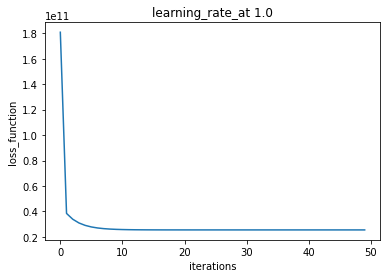

regression coefficient ([θ_0,θ_1,θ_2,θ_3]) is [519250.54999999993, 7719.2967509193195, 166327.31969509763, 53701.10923515966]
Loss function value is 25455434646.112183 after iteration
predicted y value at n_bed=3, liv_area=2000, lot_area=8550 is  486488.9037061526


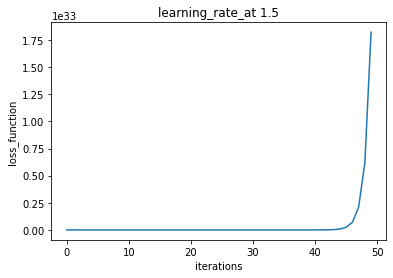

regression coefficient ([θ_0,θ_1,θ_2,θ_3]) is [519229.431466297, -4.169623245086641e+16, -5.223859509972429e+16, -3.816556691715118e+16]
Loss function value is 1.8210066706177844e+33 after iteration
predicted y value at n_bed=3, liv_area=2000, lot_area=8550 is  3.4842775109488784e+16


In [54]:
#4 Iterations with different learning rate
learning_rate  = [0.01,0.1,0.5,1.0,1.5]
for j in learning_rate:
    θ_0=0    #initialize θ
    θ_1=0
    θ_2=0
    θ_3=0
    iterations = 50
    loss_func_array = np.zeros(iterations)
    for i in range (iterations):
        y_predicted = θ_0 + θ_1*x1 + θ_2*x2 + θ_3*x3
        del_θ_0 = -j*(-1/(len(x1)))*np.sum(y-y_predicted)       # update to θ_0
        del_θ_1 = -j*(-1/(len(x1)))*np.sum((y-y_predicted)*x1) # update to θ_1
        del_θ_2 = -j*(-1/(len(x2)))*np.sum((y-y_predicted)*x2) # update to θ_2
        del_θ_3 = -j*(-1/(len(x3)))*np.sum((y-y_predicted)*x3) # update to θ_3
        θ_0 = θ_0 + del_θ_0
        θ_1 = θ_1 + del_θ_1
        θ_2 = θ_2 + del_θ_2
        θ_3 = θ_3 + del_θ_3
        loss_func = (1/(2*len(x1)))*np.sum((y-y_predicted)**2)
        loss_func_array[i] = loss_func
    plt.plot(np.arange(0,iterations,1),loss_func_array)
    plt.title('learning_rate_at '+str(j))
    plt.xlabel('iterations')
    plt.ylabel('loss_function')
    plt.show()
    print(f'regression coefficient [θ_0,θ_1,θ_2,θ_3] is {[θ_0,θ_1,θ_2,θ_3]}')
    print(f'Loss function value is {loss_func} after iteration')
    print('predicted y value at n_bed=3, liv_area=2000, lot_area=8550 is ' , θ_0 + θ_1*((3-mean_n_bed)/(std_n_bed)) + θ_2*((2000-mean_liv_area)/(std_liv_area)) + θ_3*((8550-mean_lot_area)/(std_lot_area)))